In [1]:
from pymongo import MongoClient
import pprint
import re
import datetime
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import numpy as np

In [4]:
PONTUACAO = u'[^a-zA-Z0-9áéíóúÁÉÍÓÚâêîôÂÊÎÔãõÃÕçÇ%] '
client = MongoClient('localhost', 27017)
db = client.news

In [3]:
def init_dic():
    dictionary = { "2010":0, "2011":0, "2012":0, "2013":0, "2014":0, "2015":0, "2016":0, "2017":0, "2018":0}
    return dictionary

In [4]:
def plot_article(collection):    
    dist_article_year = init_dic()
    
    for article in db[collection].find():
        dist_article_year[datetime.datetime.fromtimestamp(int(article['date'])).strftime('%Y')] +=1
        
    #plot articles
    plt.figure(figsize=(13, 4))
    plt.figure().suptitle("{0} articles".format(collection))
    plt.bar(range(len(dist_article_year)), list(dist_article_year.values()), align='center')
    plt.xticks(range(len(dist_article_year)), list(dist_article_year.keys()))
    plt.show()

<Figure size 936x288 with 0 Axes>

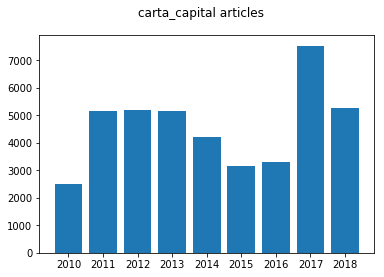

In [5]:
plot_article('carta_capital')

<Figure size 936x288 with 0 Axes>

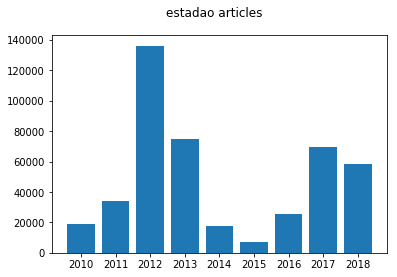

In [6]:
plot_article('estadao')

<Figure size 936x288 with 0 Axes>

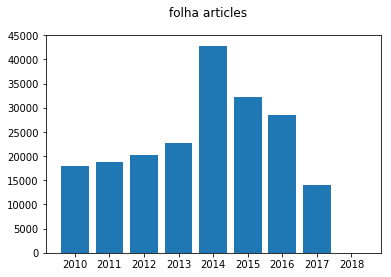

In [7]:
plot_article('folha')

<Figure size 936x288 with 0 Axes>

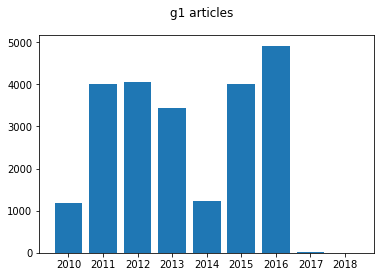

In [8]:
plot_article('g1')

In [9]:
def plot_article_comment(collection):    
    dist_article_year = init_dic()
    
    for article in db[collection].find():
        dist_article_year[datetime.datetime.fromtimestamp(int(article['date'])).strftime('%Y')] +=1
    
    plt.figure(figsize=(13, 4))
    
    #plot articles
    plt.subplot(1, 2, 1).set_title("{0} articles".format(collection))
    plt.bar(range(len(dist_article_year)), list(dist_article_year.values()), align='center')
    plt.xticks(range(len(dist_article_year)), list(dist_article_year.keys()))
    
    dist_comment_year = init_dic()

    for comment in db[collection + 'Comments'].find():
        dist_comment_year[datetime.datetime.fromtimestamp(int(comment['date'])).strftime('%Y')] +=1
        
    #plot comments
    plt.subplot(1, 2, 2).set_title("{0} comments".format(collection))
    plt.bar(range(len(dist_comment_year)), list(dist_comment_year.values()), align='center')
    plt.xticks(range(len(dist_comment_year)), list(dist_comment_year.keys()))
    plt.show()

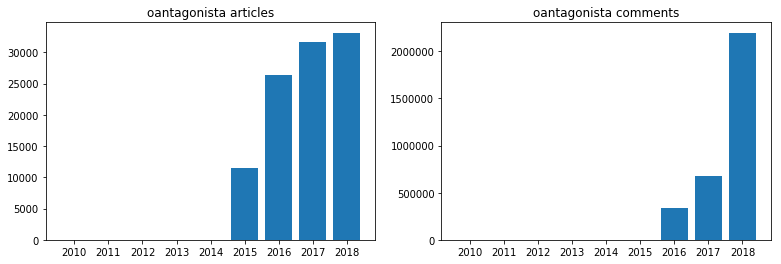

In [10]:
plot_article_comment('oantagonista')

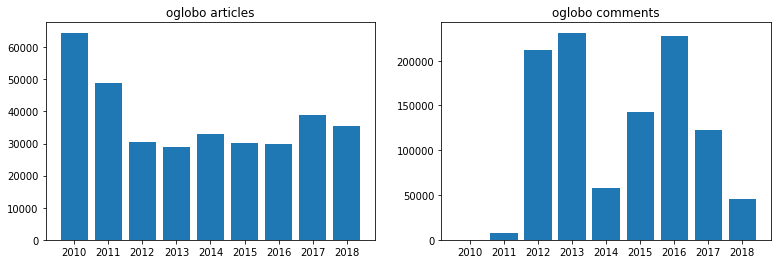

In [11]:
plot_article_comment('oglobo')

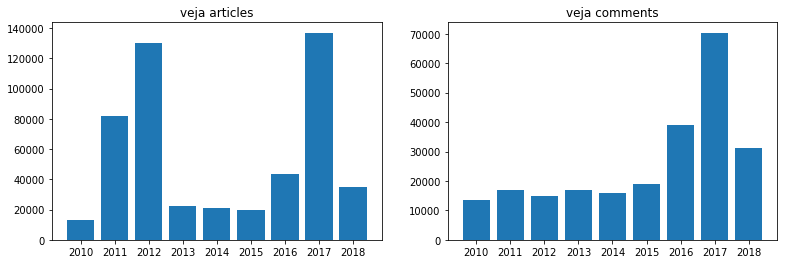

In [12]:
plot_article_comment('veja')

In [24]:
def corr_words_comments(collection):
    import time
    import datetime
    num_words = []
    num_comments = []
    deadline  = time.mktime(datetime.datetime.strptime("31/12/2017", "%d/%m/%Y").timetuple())
    for article in db[collection].find({"date": {"$gt": deadline}}, no_cursor_timeout = True):
            num_words.append(len(re.sub(PONTUACAO, ' ', article['text']).split()))
            num_comments.append(db[collection + 'Comments'].count_documents({'id_article':article['_id']}))        
#     return pearsonr(np.array(num_words), np.array(num_comments))
    return num_words, num_comments

In [25]:
num_words, num_comments = corr_words_comments('veja')

In [26]:
print(pearsonr(np.array(num_words), np.array(num_comments)))

(0.028277095626363526, 1.4386008263783926e-07)
